In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline



In [2]:
df = pd.read_csv('D:\jupyter\projects\data\healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### Describe the numerical data ?

In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### What are the unique values are in each categorical column (alphabets)?

In [5]:
def unique(df,a,b,c,d,e,f):
        print(df[a].unique())
        print(df[b].unique())
        print(df[c].unique())
        print(df[d].unique())
        print(df[e].unique())
        print(df[f].unique())
        
        
unique(df,'gender','ever_married','work_type','Residence_type','smoking_status','stroke')
    
    

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[1 0]


#### There is 'Unknown' value in the smoking_status column, how many are there ?

In [6]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [7]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [8]:
# removing the gender called Other, as there is only one value in whole dataset

df.drop(df.loc[df['gender']=="Other"].index, inplace=True)

In [9]:
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

### Q: How many missing values are there in each column ?

In [10]:
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


### Q: How many positive values of stroke are there ?

In [11]:
df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

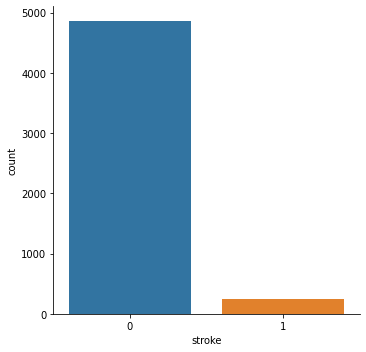

In [12]:
sns.catplot(
    data=df,
    x="stroke",
    kind="count"

)

In [13]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


### Make a dataframe where you can only look at positive stroke values

In [14]:
df_s = df[df["stroke"] == 1]

df_s


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


In [15]:
df_s.shape

(249, 12)

### Count plots of all columns which can show some relation

In [16]:
# making variable for columns

col = df.columns
print(col)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


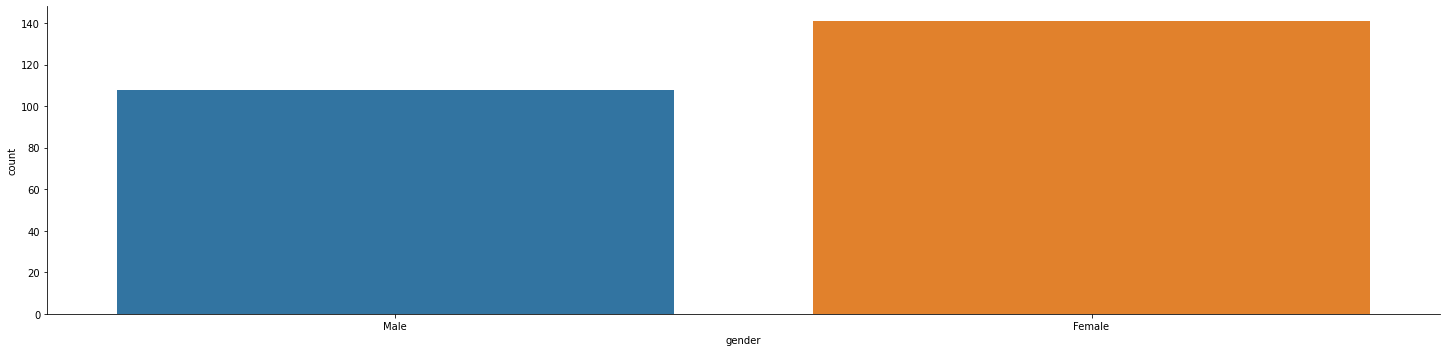

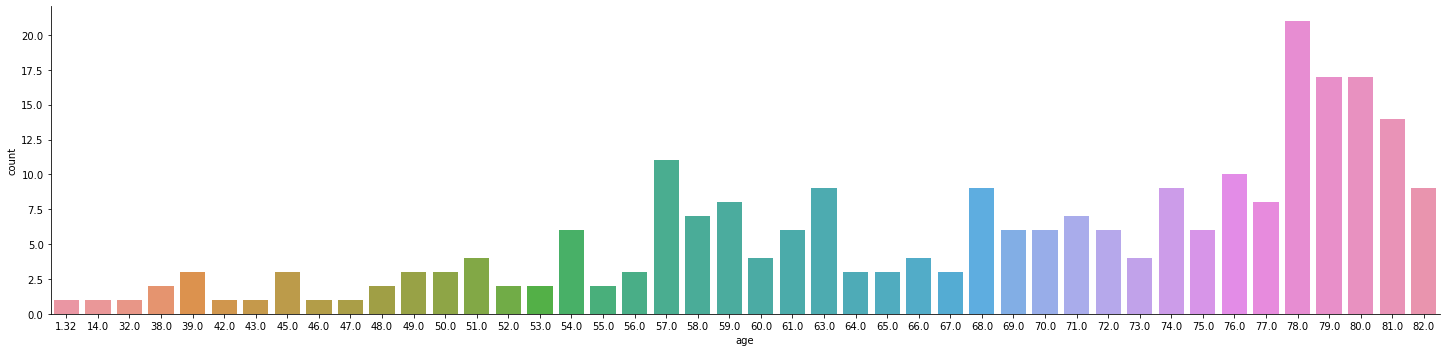

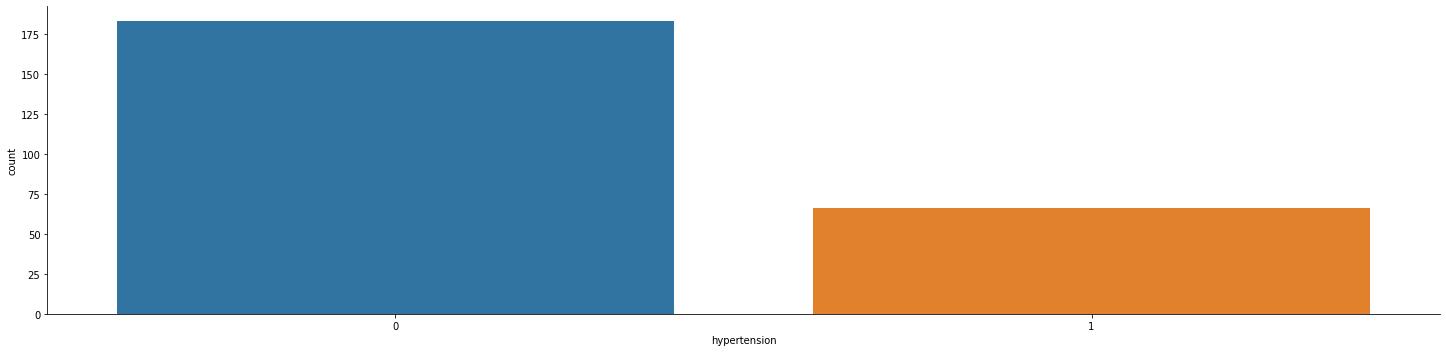

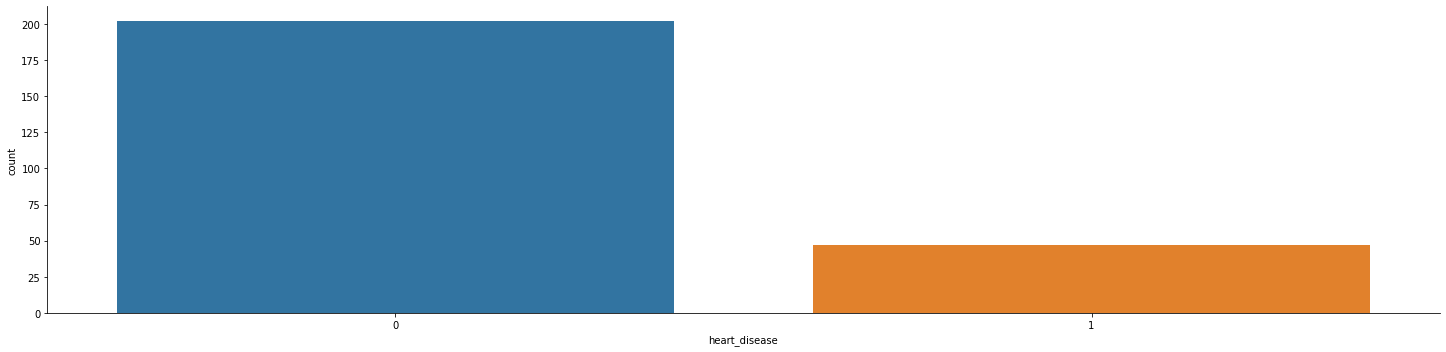

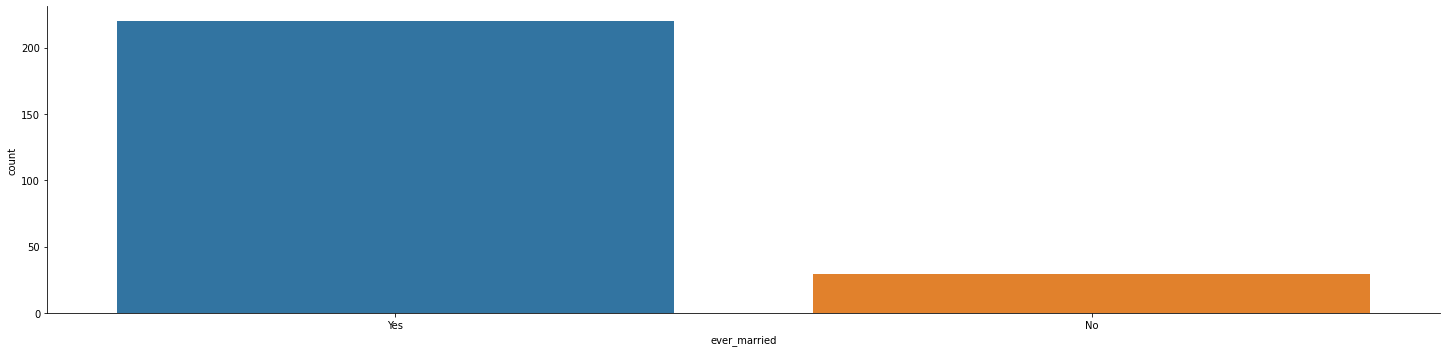

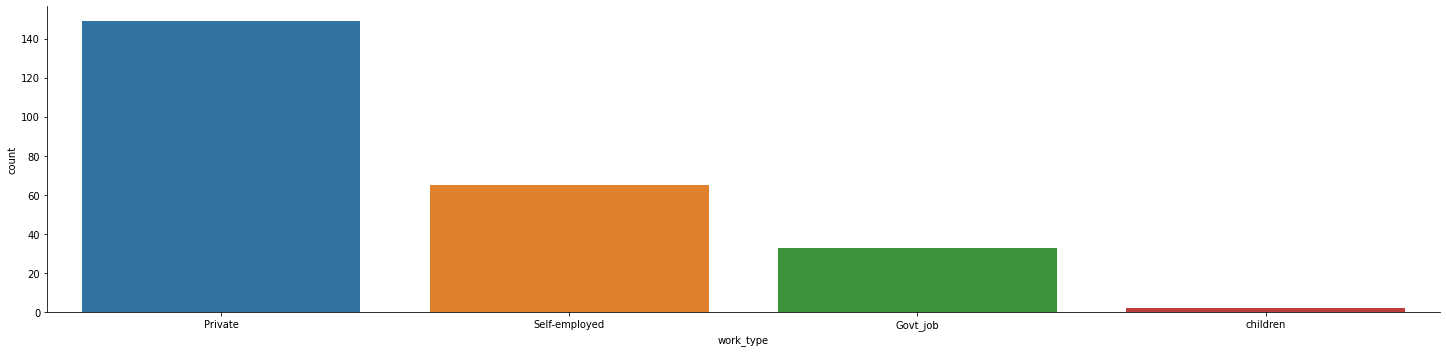

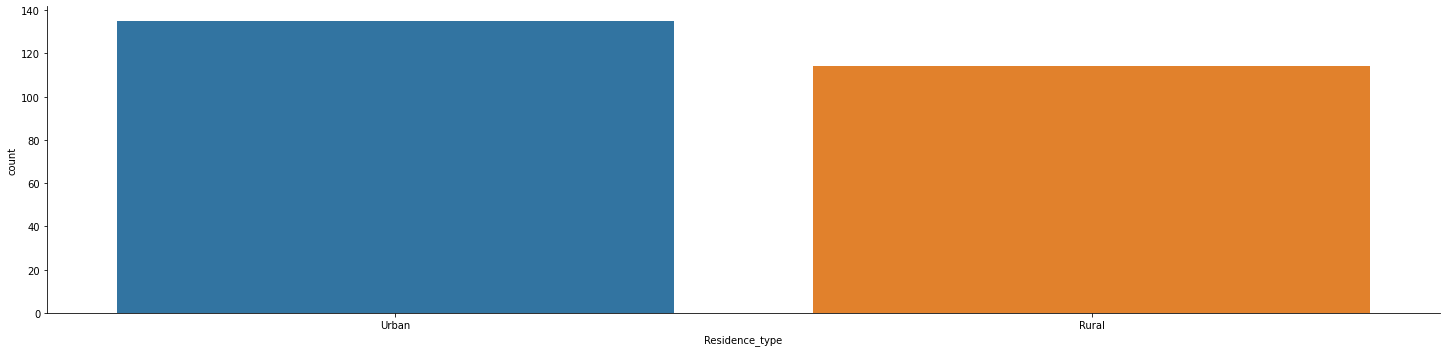

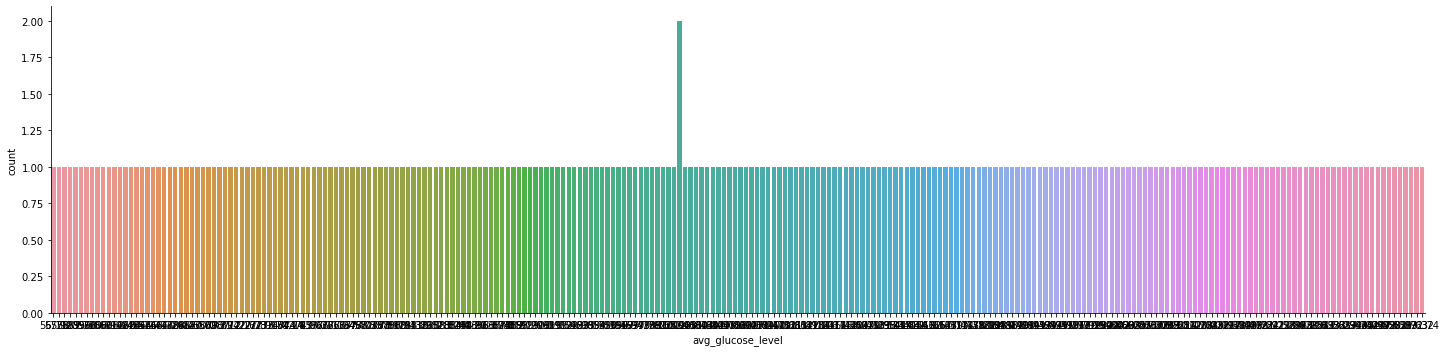

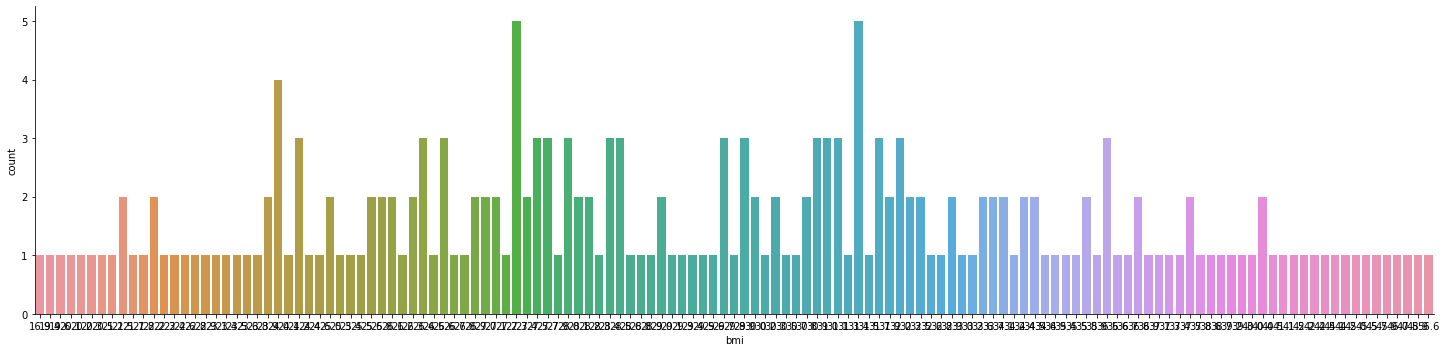

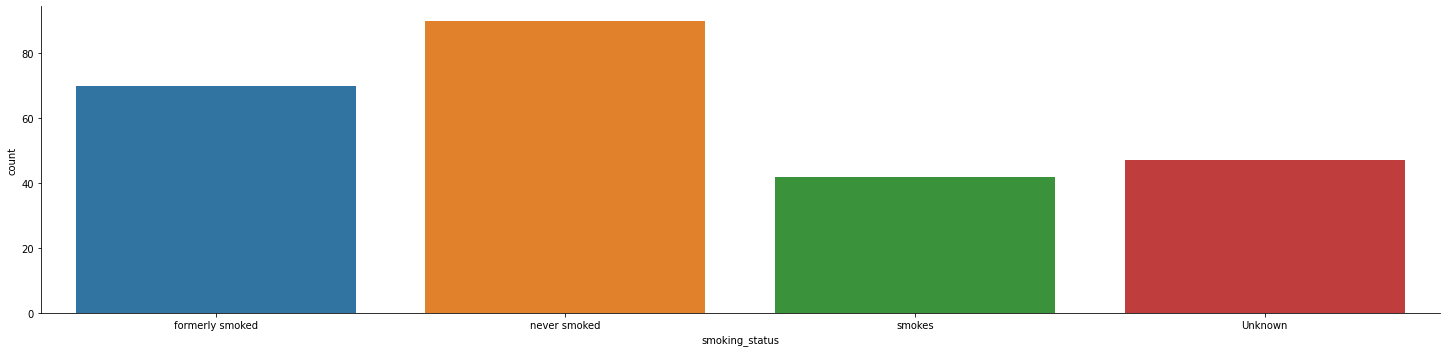

In [17]:
# making count plots of everything except the id and stroke column

for i in range(1,(len(col)-1)):
    sns.catplot(
        data=df_s,
        x=col[i],
        kind="count",
        height=5,
        aspect=4)
        
        

#### Define inputs and target columns

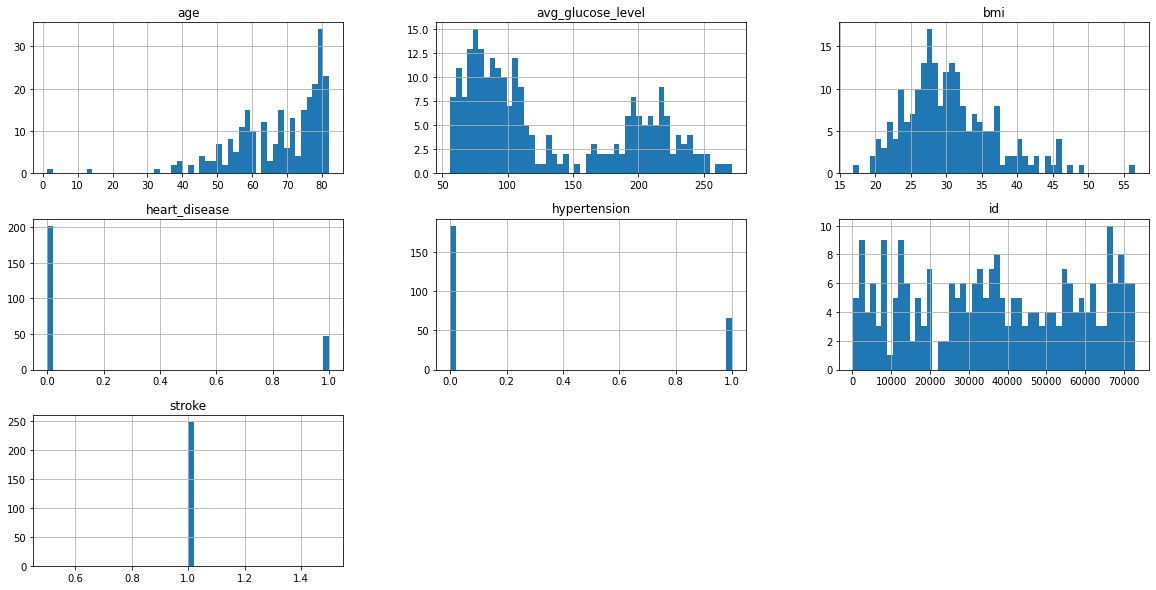

In [20]:
# histograms of stroke = True

%matplotlib inline
import matplotlib.pyplot as plt
df_s.hist(bins=50, figsize=(20,10))
#save_fig("attribute_histogram_plots")
plt.show()

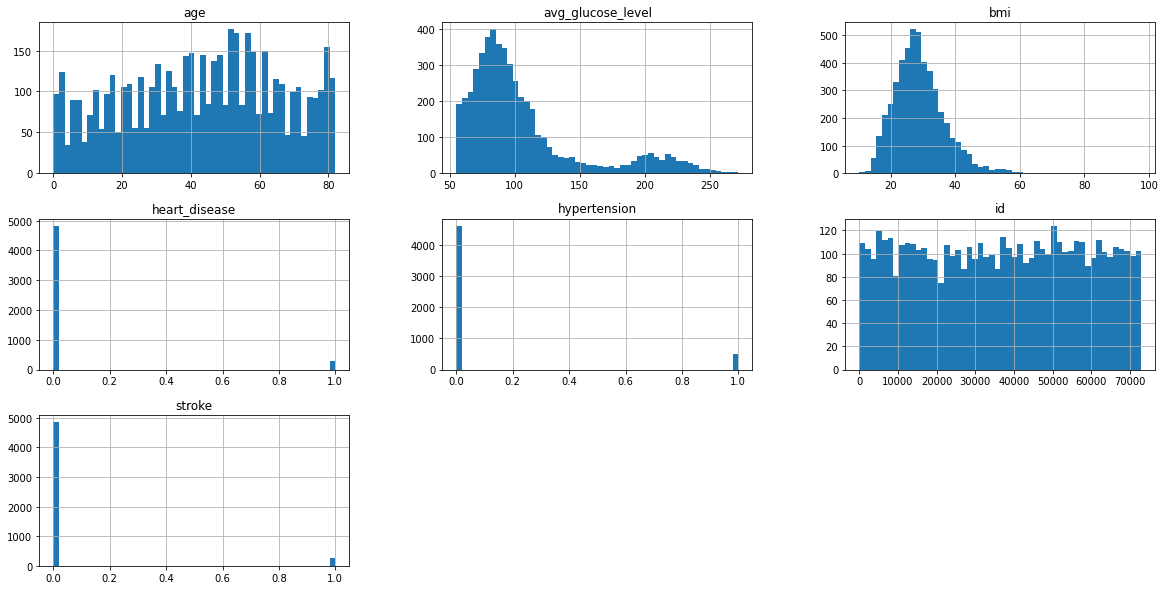

In [21]:
# histograms of all data

%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,10))
#save_fig("attribute_histogram_plots")
plt.show()

<AxesSubplot:>

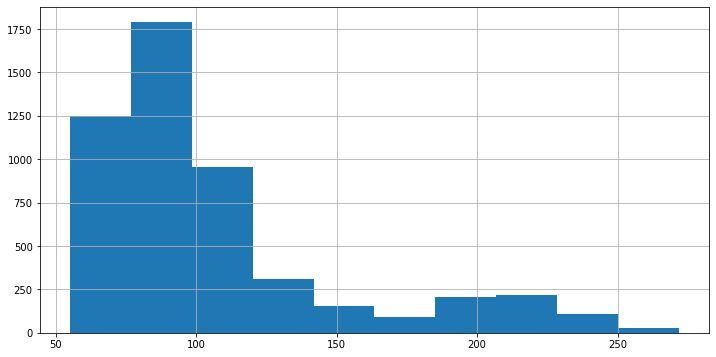

In [34]:
df["avg_glucose_level"].hist(figsize=(12,6))


In [41]:
df["avg_glucose_cat"] = pd.cut(df["avg_glucose_level"],
                               bins=[50. , 100, 150, 200, 250, 300, np.inf],
                               labels=[1, 2, 3, 4, 5, 6])



<AxesSubplot:>

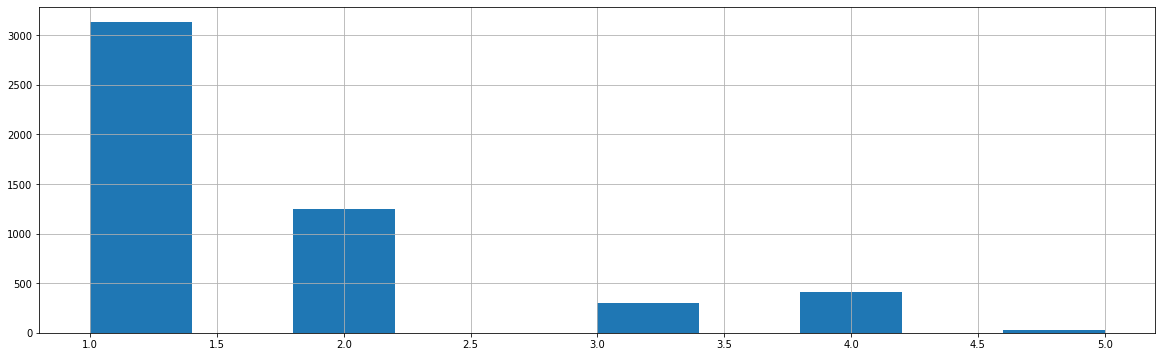

In [42]:
df["avg_glucose_cat"].hist(figsize=(20,6))

In [18]:
# dropping stroke as it is target

inputs = df.drop('stroke',axis='columns')

inputs.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked


In [120]:
target = df['stroke']
target.head(5)

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [121]:
from sklearn.preprocessing import LabelEncoder
label_worktype = LabelEncoder()
inputs['work_type_num']=label_worktype.fit_transform(inputs['work_type'])

In [122]:
inputs.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,work_type_num
0,9046,Male,67.0,0,1,Yes,Private,Urban,36.6,formerly smoked,2
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,NaN,never smoked,3
2,31112,Male,80.0,0,1,Yes,Private,Rural,32.5,never smoked,2
3,60182,Female,49.0,0,0,Yes,Private,Urban,34.4,smokes,2
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,24.0,never smoked,3
